In [1]:
import sys
for path in sys.path:
    print(path)

C:\Pace\Jupyter-NBs\Computer-Science\CS-675\Time-Series
C:\Users\TSarbanes\anaconda3\envs\tf_py38\python38.zip
C:\Users\TSarbanes\anaconda3\envs\tf_py38\DLLs
C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib
C:\Users\TSarbanes\anaconda3\envs\tf_py38

C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib\site-packages
C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib\site-packages\win32
C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib\site-packages\win32\lib
C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib\site-packages\Pythonwin
C:\Users\TSarbanes\anaconda3\envs\tf_py38\lib\site-packages\IPython\extensions
C:\Users\TSarbanes\.ipython


In [2]:
# Prophet - Forecasting Engine: FB's Prophet Library (Default Parameters for Prophet)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [4]:
# Load the dataset
#
import pandas as pd
#
ts_df = pd.read_csv('./data/CR_timeSeries_Dataset.csv')
ts_df.head()

,date_,BANKING BOOK BONDS,BANKING BOOK EQUITIES,COMMERCIAL LENDING,E/T DERIVATIVES,EQUITY,EQUITY_MR,OPEN TRADES,OTC DERIVATIVES,OTHER ASSETS,UNCOLLATERALIZED LOANS,CR RWA
0,2016-06-30,0.0,2.886059,0.0,634876.875,-0.125,0.0,1.690703e+08,78765665.25,-1818159.25,49858827.83,2.965116e+08
1,2016-07-01,0.0,2.894397,0.0,634876.875,-0.125,0.0,1.313171e+08,78765665.25,-1818159.25,49858827.83,2.587583e+08
2,2016-07-04,0.0,2.894397,0.0,634876.875,-0.125,0.0,1.313171e+08,78765665.25,-1818159.25,49858827.83,2.587583e+08
3,2016-07-05,0.0,2.894397,0.0,634876.875,-0.125,0.0,1.313171e+08,78765665.25,-1818159.25,49858827.83,2.587583e+08
4,2016-07-06,0.0,2.878465,0.0,634876.875,-0.125,0.0,1.408863e+08,78765665.25,-1818159.25,50228441.35,2.686971e+08


In [5]:
ts_df.shape

(845, 12)

In [6]:
# Interested only on 'date_' and 'CR RWA' columns
df = ts_df[['date_','CR RWA']]
df.head()

,date_,CR RWA
0,2016-06-30,2.965116e+08
1,2016-07-01,2.587583e+08
2,2016-07-04,2.587583e+08
3,2016-07-05,2.587583e+08
4,2016-07-06,2.686971e+08


In [7]:
# Last date entry is '2019-09-25'
df.tail()

,date_,CR RWA
840,2019-09-19,2.418058e+08
841,2019-09-20,2.534817e+08
842,2019-09-23,4.347451e+08
843,2019-09-24,4.436607e+08
844,2019-09-25,4.109487e+08


In [7]:
df.shape

(845, 2)

In [8]:
df.columns

Index(['date_', 'CR RWA'], dtype='object')

In [9]:
# make the dataset Prophet-compliant
#
# Works with a 'ds' and 'y' column names
#
# df.rename(columns={'date_':'ds','CR RWA':'y'}, inplace=True)
#
col_dict = {'date_': 'ds', \
            'CR RWA': 'y'}   ## key→old name, value→new name

# Rename the above columns, in place
df.columns = [col_dict.get(x, x) for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      845 non-null    object 
 1   y       845 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.3+ KB


In [10]:
df.columns

Index(['ds', 'y'], dtype='object')

In [11]:
# Converting 'y' column to its log value
#
# np.log(df['y'])
#
df = df.assign(y=np.log(df['y']))

In [12]:
df['y'].head()

0    19.507597
1    19.371405
2    19.371405
3    19.371405
4    19.409095
Name: y, dtype: float64

In [13]:
df.columns

Index(['ds', 'y'], dtype='object')

In [14]:
df.head()

,ds,y
0,2016-06-30,19.507597
1,2016-07-01,19.371405
2,2016-07-04,19.371405
3,2016-07-05,19.371405
4,2016-07-06,19.409095


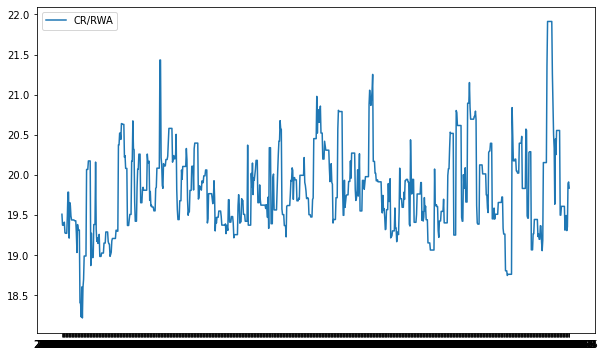

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['CR/RWA'])

In [16]:
from fbprophet import Prophet

In [17]:
# Initialize the Model
# By default, Prophet uses a linear model for its forecast 
# but a logistic model
#
# model = Prophet(growth='logistic')
#
# model = Prophet()

**Parameters**

- growth: linear/logistic
- seasonality:additive/multiplicative
- holidays:
- changepoint:


**Seasonalities**

Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly)if required.

model = Prophet(daily_seasonality=True)

model.fit(df)

In [18]:
model = Prophet(daily_seasonality=True)
#

In [19]:
# Fit the model to our data
#
model.fit(df)

**Prophet forecast**

We need to make a dataframe of future dates with the **.make_future_dataframe method**.

Let's make 12 months worth of predictions.

Note that Prophet's make_future_dataframe method **makes a DataFrame that includes the historical data, as well as the predictions**.

In [20]:
# Create Future Dates of 60 days
# Need to tell Prophet how far to predict in future. 
# For this, we need to make a dataframe for future predictions 
# using make_future_dataframe. 
# I would only like to predict the views for the next 60 days.
#
# future_dates = model.make_future_dataframe(periods=365)
future_dates = model.make_future_dataframe(periods=60)

In [21]:
# Shape of Dataset after adding 60 days
future_dates.shape

(905, 1)

In [22]:
future_dates.head()

,ds
0,2016-06-30
1,2016-07-01
2,2016-07-04
3,2016-07-05
4,2016-07-06


In [23]:
# See above, df.tail()
# The last date of 'df' was 2019-09-25
future_dates.tail()

,ds
900,2019-11-20
901,2019-11-21
902,2019-11-22
903,2019-11-23
904,2019-11-24


In [24]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

'prediction' is essentially a pandas dataframe and consists of a lot of fields. 

The predict method will assign <u> each row in future a predicted value</u> which it names **yhat** and the range is defined by **yhat_lower** and **yhat_upper**.

These ranges can be considered as **uncertainty levels**.

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-30,19.478779,18.770008,19.925050,19.478779,19.478779,-0.138157,-0.138157,-0.138157,-0.035086,...,0.006637,0.006637,0.006637,-0.109707,-0.109707,-0.109707,0.0,0.0,0.0,19.340623
1,2016-07-01,19.480366,18.653118,19.862222,19.480366,19.480366,-0.177348,-0.177348,-0.177348,-0.035086,...,-0.000001,-0.000001,-0.000001,-0.142260,-0.142260,-0.142260,0.0,0.0,0.0,19.303018
2,2016-07-04,19.485124,18.624157,19.766830,19.485124,19.485124,-0.285629,-0.285629,-0.285629,-0.035086,...,-0.007249,-0.007249,-0.007249,-0.243294,-0.243294,-0.243294,0.0,0.0,0.0,19.199495
3,2016-07-05,19.486710,18.644370,19.714632,19.486710,19.486710,-0.319610,-0.319610,-0.319610,-0.035086,...,-0.008399,-0.008399,-0.008399,-0.276125,-0.276125,-0.276125,0.0,0.0,0.0,19.167100
4,2016-07-06,19.488296,18.574375,19.689373,19.488296,19.488296,-0.342376,-0.342376,-0.342376,-0.035086,...,0.000240,0.000240,0.000240,-0.307530,-0.307530,-0.307530,0.0,0.0,0.0,19.145920


In [26]:
# Or I will use the Transpose function to transpose the dataframe 
# so that all the columns are visible. 
#
prediction.tail().T

,900,901,902,903,904
ds,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00
trend,20.410524,20.412783,20.415042,20.417302,20.419561
yhat_lower,20.014943,20.055458,20.093467,19.980778,19.992525
yhat_upper,21.179832,21.253056,21.165634,21.181903,21.166119
trend_lower,20.383166,20.384614,20.386534,20.388539,20.390097
trend_upper,20.431674,20.434661,20.437562,20.440912,20.443654
additive_terms,0.217322,0.219974,0.204381,0.194904,0.176547
additive_terms_lower,0.217322,0.219974,0.204381,0.194904,0.176547
additive_terms_upper,0.217322,0.219974,0.204381,0.194904,0.176547
daily,-0.035086,-0.035086,-0.035086,-0.035086,-0.035086


However, we are only interested in the yhat, yhat_lower and y_hat_upper values but I have shown these values above to highlight the Prophet’s ability to infer various values from the given data. Essentially, our desired dataframe will be as follows:

In [27]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
900,2019-11-20,20.627846,20.014943,21.179832
901,2019-11-21,20.632757,20.055458,21.253056
902,2019-11-22,20.619423,20.093467,21.165634
903,2019-11-23,20.612205,19.980778,21.181903
904,2019-11-24,20.596108,19.992525,21.166119


Since we took the log of Views, let’s convert back to original values.

In [28]:
np.exp(prediction[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
900,9.089913e+08,4.924694e+08,1.578643e+09
901,9.134662e+08,5.128314e+08,1.698576e+09
902,9.013671e+08,5.326991e+08,1.556389e+09
903,8.948845e+08,4.759283e+08,1.581917e+09
904,8.805946e+08,4.815522e+08,1.557143e+09


**Plotting the Forecast**

Visualisation, especially in Time Series data, makes more sense than mere numbers. Let’s plot the forecast by calling the Prophet.plot method and passing in the forecast dataframe.


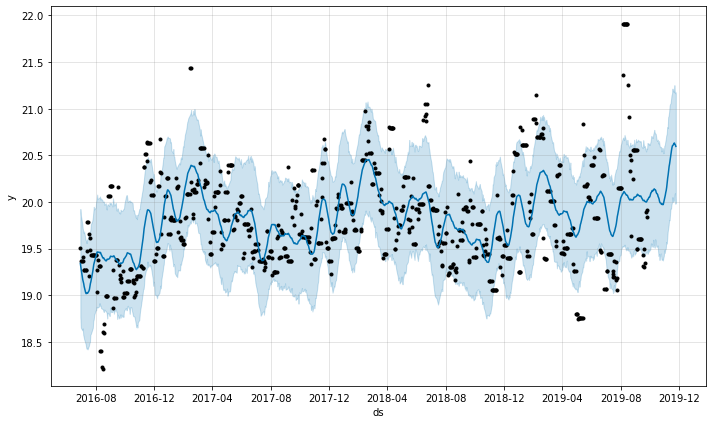

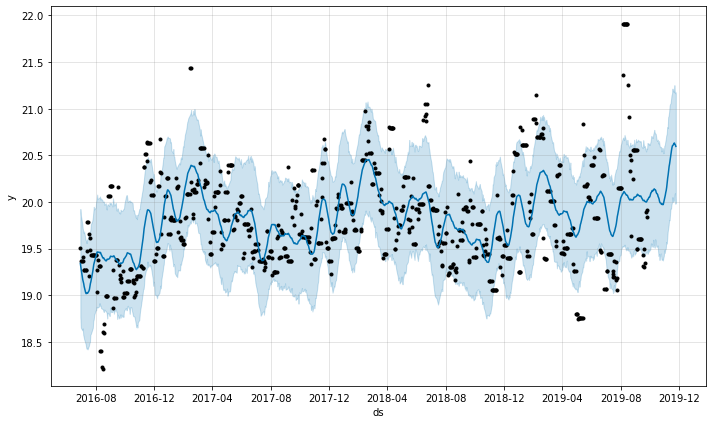

In [29]:
# Plot our prediction
#
# Plotting forecast for the next 60 days
#
model.plot(prediction)

**Graph Explain**

+ A Trednding data
+ Black dots : Actual data points from our dataset
+ Deep Blue Line : The Predicted Forecast / The Predicted 
+ Light Blue Area : Boundary around Prediction


We can also see the **forecast components**, by using the **Prophet.plot_components method**. 

This will show us the daily and weekly trends which makes the picture more clear. If you have data pertaining to different years, you can enable the yearly_seasonality to observe the yearly trends also.

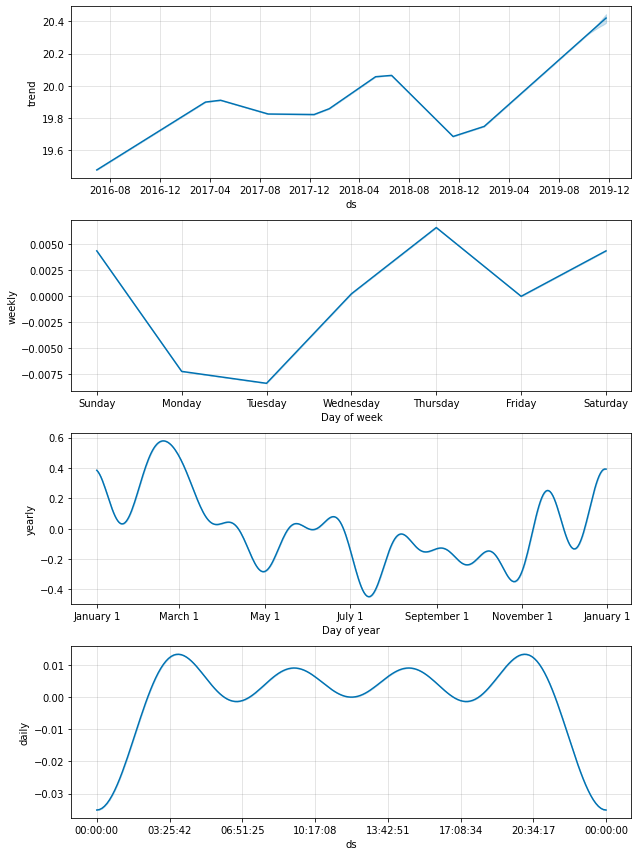

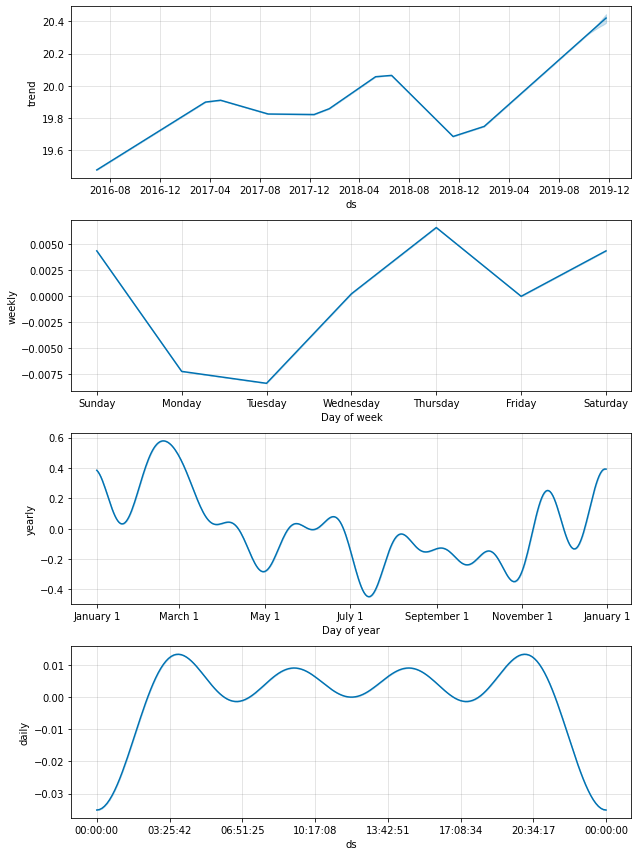

In [30]:
# Visualize Each Component (Trend, Seasonality, ...)
model.plot_components(prediction)

**Cross Validation**

+ For measuring forecast error by comparing the predicted values with the actual values
+ **initial** : the size of the initial training period
+ **period** : the spacing between cutoff dates 
+ **horizon** : the forecast horizon (ds minus cutoff)
+ By default, the initial training period is set to three times the horizon, and cutoff are made every half a horizon.


In [31]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

**Prophet Diagnostics**

Prophet includes functionality for time series **cross validation** to measure forecast error using historical data. This is done by selecting **cutoff points** in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

https://facebook.github.io/prophet/docs/diagnostics.html
    

In [32]:
# cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')
cv = cross_validation(model, initial='845 days', period='120 days', horizon='60 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-11-29 00:00:00 and 2019-07-27 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-11-30,19.465461,19.047281,19.875649,19.543804,2018-11-29
1,2018-12-03,19.348447,18.893260,19.809972,19.543804,2018-11-29
2,2018-12-04,19.313454,18.915539,19.760539,19.543804,2018-11-29
3,2018-12-05,19.308966,18.897125,19.740865,19.543692,2018-11-29
4,2018-12-06,19.297435,18.855358,19.746982,19.695173,2018-11-29


**Performance Metrics**

In [34]:
from fbprophet.diagnostics import performance_metrics

In [35]:
df_pm = performance_metrics(cv)
df_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.441602,0.664531,0.605889,0.030458,0.029583,0.333333
1,7 days,0.369296,0.607698,0.550377,0.027772,0.027732,0.416667
2,8 days,0.325082,0.570160,0.501097,0.025306,0.024714,0.500000
3,9 days,0.706145,0.840324,0.640973,0.031692,0.024714,0.472222
4,10 days,1.322229,1.149882,0.825424,0.039906,0.026172,0.416667


In [36]:
df_pm.shape

(55, 7)

**Visualizing Performance Metrics**

- cutoff: how far into the future the prediction was

In [37]:
from fbprophet.plot import plot_cross_validation_metric

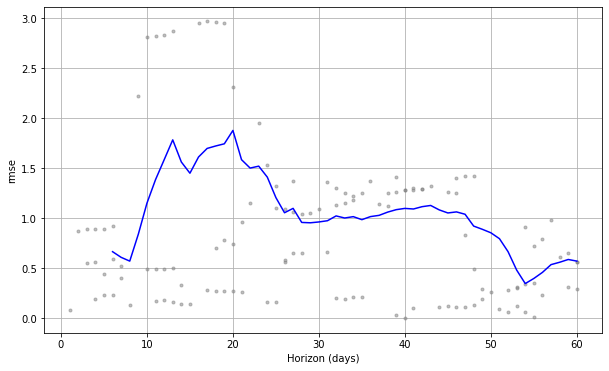

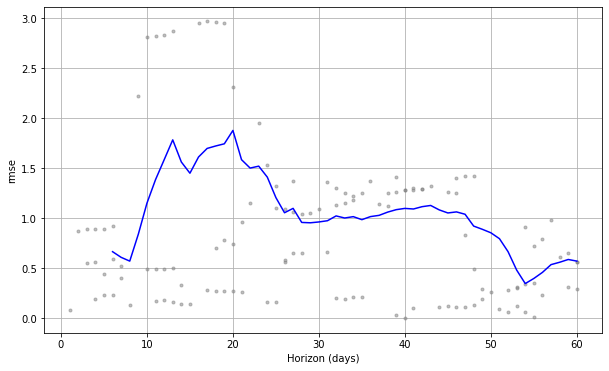

In [38]:
plot_cross_validation_metric(cv, metric='rmse')

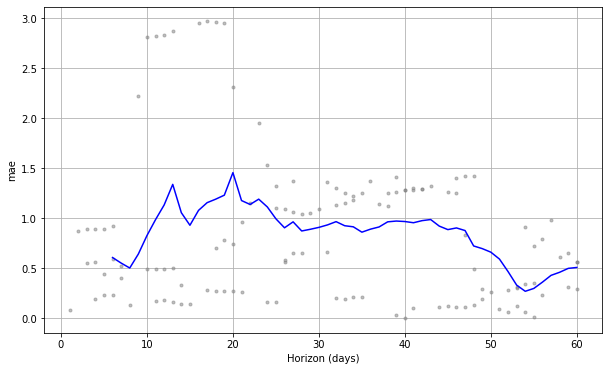

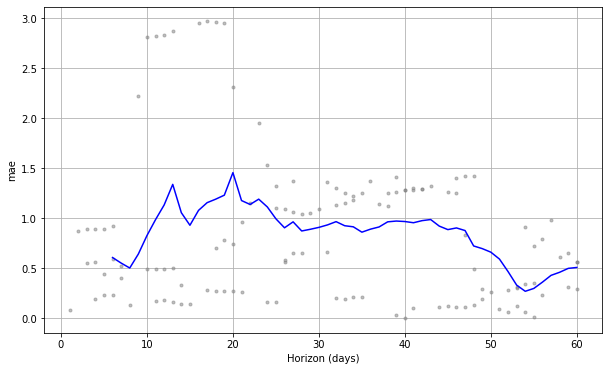

In [39]:
plot_cross_validation_metric(cv, metric='mae')